# Supervised Learning
In supervised learning, we want to predict an outcome given certain inputs, by training a model on input/output pairs.

* Classification: predict a _class label_ (category), e.g. spam/not spam
* Regression: predict a continuous number, e.g. temperature

## Generalization, Overfitting and Underfitting
* Data is always split in training and test data
* We hope that the model can _generalize_ from the training to the test data: make accurate predictions on unseen data
* It's easy to build a complex model that is 100% accurate on the training data, but very bad on the test data
* Overfitting: building a model that is _too complex for the amount of data_ that we have
    * You model peculiarities in your data (noise, biases,...)
* Underfitting: building a model that is _too simple given the complexity of the data_

* There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.  
[model complexity image](http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

## Supervised Machine Learning Algorithms
* We'll discuss the most popular algorithms
    * How do they work (intuitively)
    * How to control complexity
    * Hyperparameters (user-controlled parameters)
    * Strengths and weaknesses

### k-Nearest Neighbor

* Building the model consists only of storing the training dataset. 
* To make a prediction, the algorithm finds the _k_ closest data points in the training dataset

#### k-Nearest Neighbor Classification
for k=1: return the class of the nearest neighbor

In [266]:
# Global imports and settings
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # Use 300 for PDF, 100 for slides
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

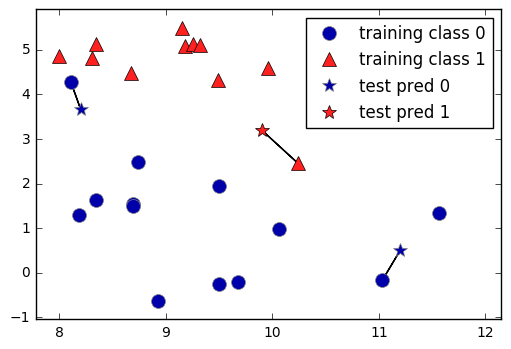

In [267]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

for k>1: do a vote and return the majority (or a confidence value for each class)

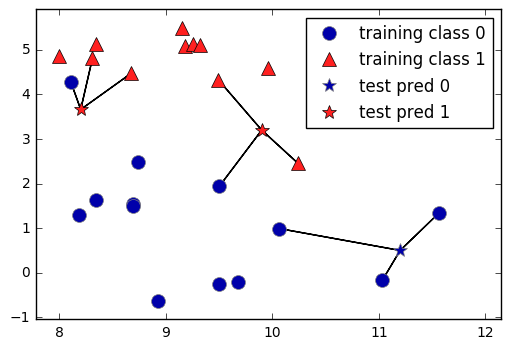

In [268]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Let's build a kNN model for this dataset (called 'Forge')

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [270]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.86


#### Analysis
We can plot the prediction for each possible input to see the _decision boundary_

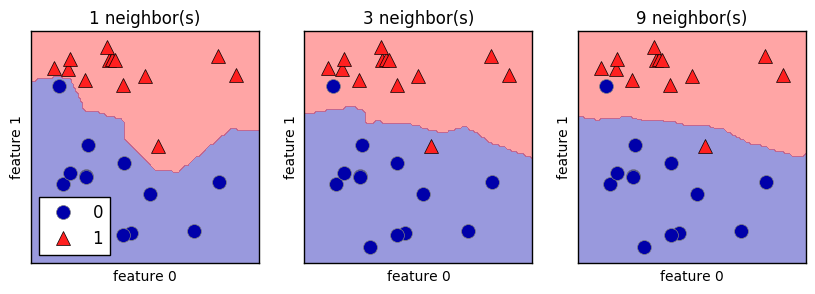

In [271]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
_ = axes[0].legend(loc=3)

Using few neighbors corresponds to high model complexity (left), and using many neighbors corresponds to low model complexity and smoother decision boundary (right).

We can more directly measure the effect on the training and test error on a larger dataset (breast_cancer)

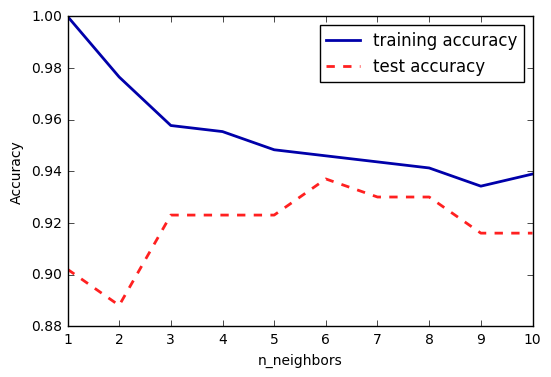

In [272]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 11)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

For small numbers of neighbors, the model is too complex, and overfits the training data. As more neighbors are considered, the model becomes simpler and the training accuracy drops, yet the test accuracy increases, up to a point. After about 8 neighbors, the model starts becoming too simple (underfits) and the test accuracy drops again.

#### k-Neighbors Regression
for k=1: return the target value of the nearest neighbor

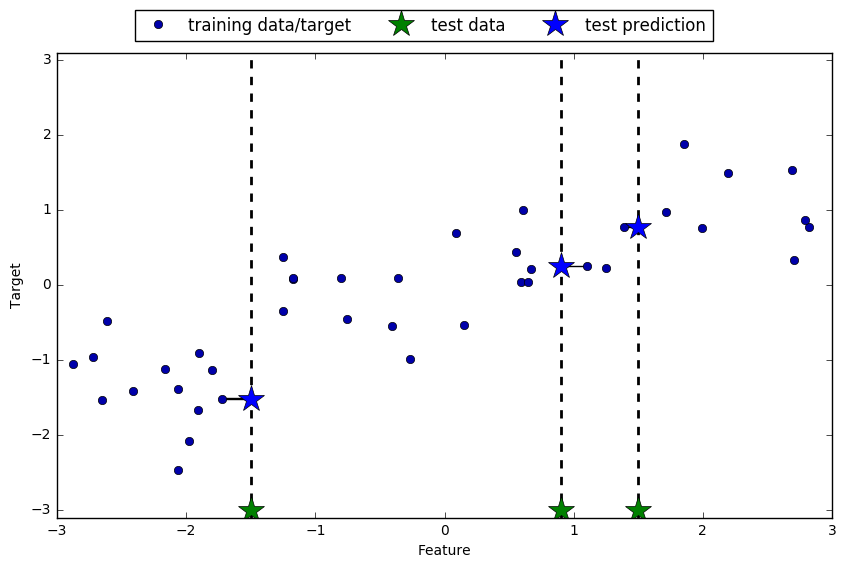

In [273]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

for k>1: return the _mean_ of the target values of the _k_ nearest neighbors

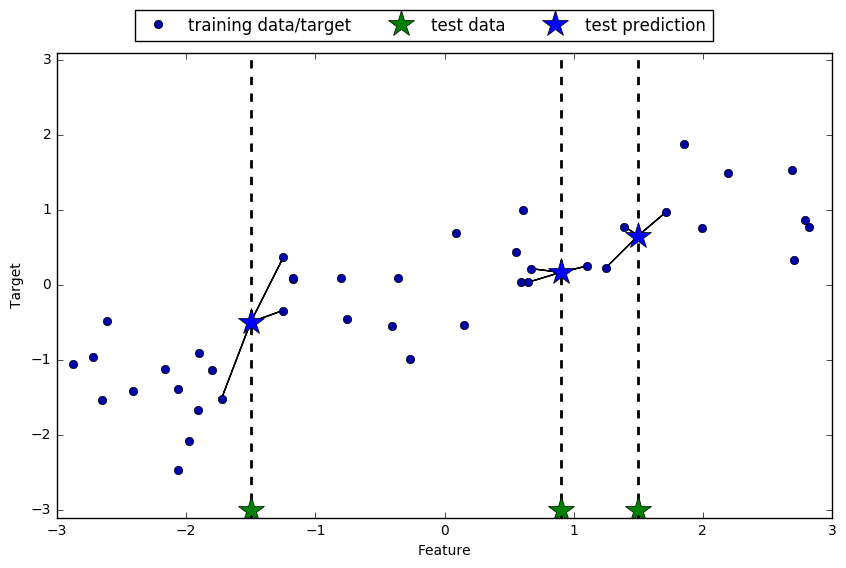

In [274]:
mglearn.plots.plot_knn_regression(n_neighbors=3
                                )

To do regression, simply use `KNeighborsRegressor` instead

In [275]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

The default scoring function for regression models is $R^{2}$. It measures how much of the data variability is explained by the model. Between 0 and 1.

In [276]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [277]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analysis
We can again output the predictions for each possible input, for different values of _k_.

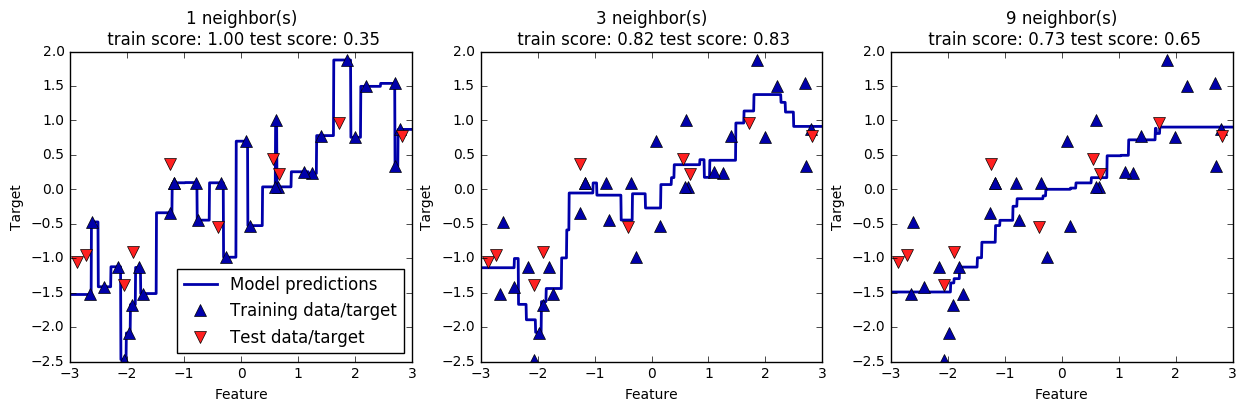

In [278]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
_ = axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

We see that again, a small _k_ leads to an overly complex (overfitting) model, while a larger _k_ yields a smoother fit.

### Strengths, weaknesses and parameters
* There are two important hyperparameters:
    * n_neighbors: the number of neighbors used
    * metric: the distance measures used
        * Default is Minkowski (generalized Euclidean) distance.
* Easy to understand, works well in many settings
* Training is very fast, predicting is slow for large datasets
* Bad at high-dimensional and sparse data (curse of dimensionality)

### Linear models
Linear models make a prediction using a linear function of the input features. Can be very powerful for or datasets with many features. 

If you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

#### Linear models for regression
Prediction formula for input features x. $w_i$ and b are the _model parameters_ that need to be learned.  

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b$

There are many different algorithms, differing in how w and b are learned from the training data.

w[0]: 0.393906  b: -0.031804


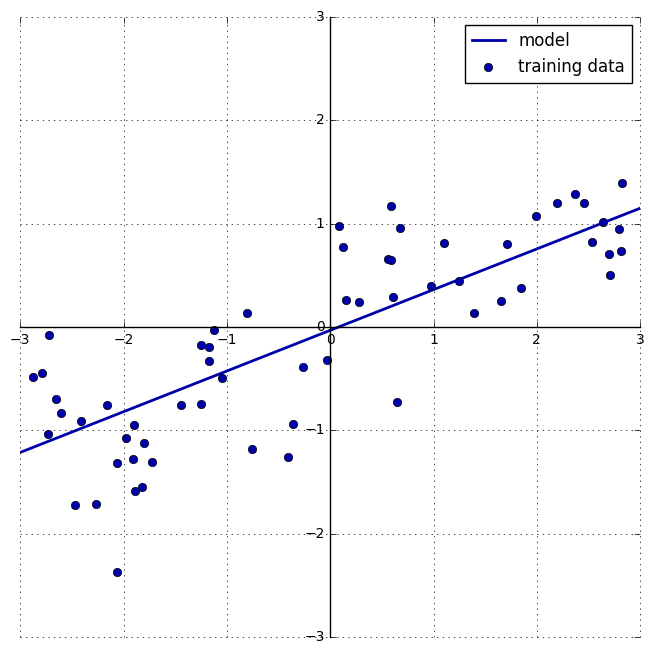

In [279]:
mglearn.plots.plot_linear_regression_wave()

#### Linear Regression aka Ordinary Least Squares
* Finds the parameters w and b that minimize the _mean squared error_ between predictions and the true regression targets, y, on the training set. 
    * MSE: Sum of the squared differences between the predictions and the true values.
* It has no hyperparameters, thus model complexity cannot be controlled.

Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.

In [280]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [281]:
print("Weights (coefficients): {}".format(lr.coef_))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -402.752   -50.071  -133.317   -12.002   -12.711    28.305    54.492
   -51.734    25.26     36.499   -10.104   -19.629   -21.368    14.647
  2895.054  1510.269   117.995   -26.566    31.249   -31.446    45.254
  1283.496 -2246.003   222.199    -0.466    40.766   -13.436   -19.096
    -2.776   -80.971     9.731     5.133    -0.788    -7.603    33.672
   -11.505    66.267   -17.563    42.983     1.277     0.61     57.187
    14.082    55.34    -30.348    18.812   -13.777    60.979   -12.579
   -12.002   -17.698   -34.028     7.15     -8.41     16.986   -12.941
   -11.806    57.133   -17.581     1.696    27.218   -16.745    75.03
   -30.272    47.78    -40.541     5.504    21.531    25.366   -49.485
    28.109    10.469   -71.559   -23.74      9.574    -3.788     1.214
    -4.72     41.238   -37.702    -2.156   -26.296   -33.202    45.932
   -23.014   -17.515   -14.085   -20.49     36.525   -94.897   143.234
   -15.674   -14.973   -28.613   -31.252    24.565   -

In [282]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


### Ridge regression
* Same formula as linear regression
* Requires that the coefficients (w) are close to zero.
    * Each feature should have as little effect on the outcome as possible 
* Regularization: explicitly restrict a model to avoid overfitting. 
* Type of L2 regularization: prefers many small weights
    * L1 regularization prefers sparsity: many weights to be 0, others large

`Ridge` can also be found in `sklearn.linear_model`.

In [283]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

The strength of the regularization can be controlled with the `alpha` parameter. Default is 1.0.
* Increasing alpha forces coefficients to move more toward zero (more regularization)
* Decreasing alpha allows the coefficients to be less restricted (less regularization)

In [284]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [285]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can plot the weight values for differents levels of regularization.

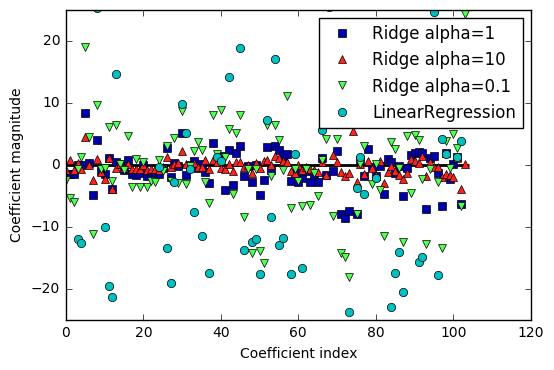

In [286]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available. With enough training data, regularization becomes less important: ridge and linear regression will have the same performance.

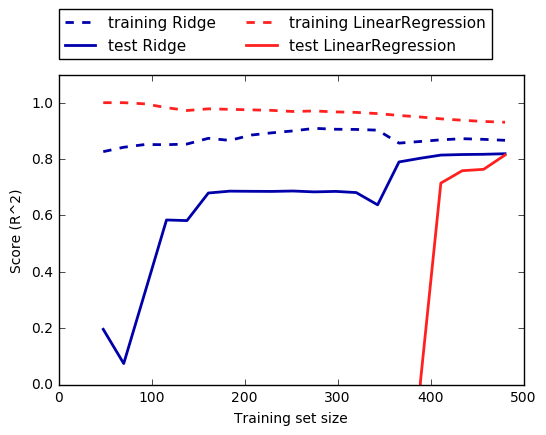

In [287]:
mglearn.plots.plot_ridge_n_samples()

### Lasso
* Another form of regularization
* Prefers coefficients to be exactly zero (L1 regularization).
* Some features are entirely ignored by the model: automatic feature selection.
* Same parameter `alpha` to control the strength of regularization. 
* New parameter `max_iter`: the maximum number of iterations
    * Should be higher for small values of `alpha`

In [288]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [289]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [290]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


We can again analyse what happens to the weigths:

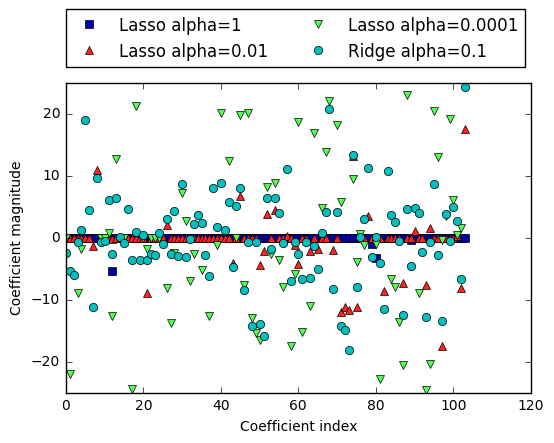

In [291]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude");

#### Linear models for Classification
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

There are many algorithms for learning linear classification models, differing in:

* Loss function: evaluate how well the linear model fits the training data
* Regularization techniques

Most common techniques:

* Logistic regression: 
    * `sklearn.linear_model.LogisticRegression`
* Linear Support Vector Machine: 
    * `sklearn.svm.LinearSVC`


Logistic regression: fits a logistic regression curve/surface to the data  
[LogisticRegression image](images/logistic.png)

[Source](https://florianhartl.com/logistic-regression-geometric-intuition.html)

Linear SVM: find hyperplane maximizing the _margin_ between the classes  
[SVC Image](images/svm.png)   
Prediction is identical to (weighted) kNN: find the support vector that is nearest, according to a distance measure and a weight for each support vector.

Comparison

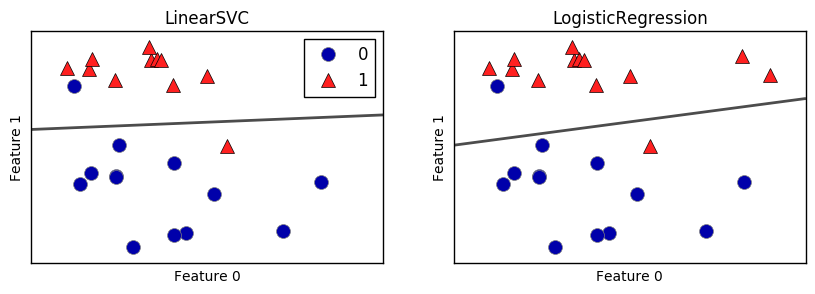

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Both methods can be regularized:
* L2 regularization by default, L1 also possible
* _C_ parameter: inverse of strength of regularization
    * higher _C_: less regularization
    * penalty for misclassifying points while keeping $w_i$ close to 0

High _C_ values (less regularization): fewer misclassifications but smaller margins.

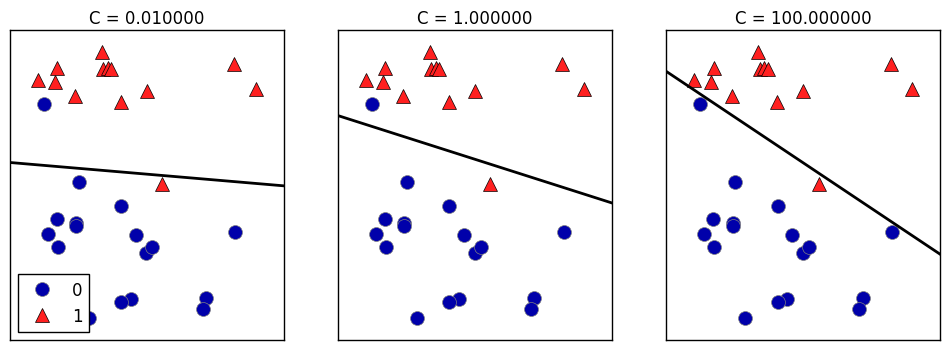

In [293]:
mglearn.plots.plot_linear_svc_regularization()

Model selection: Logistic regression

In [294]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [295]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [296]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


Effect of _C_ on model parameters:

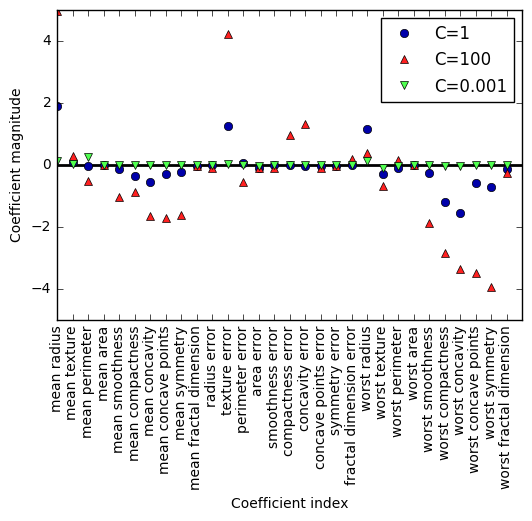

In [297]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Idem with L1 regularization (`penalty='l1'`):

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


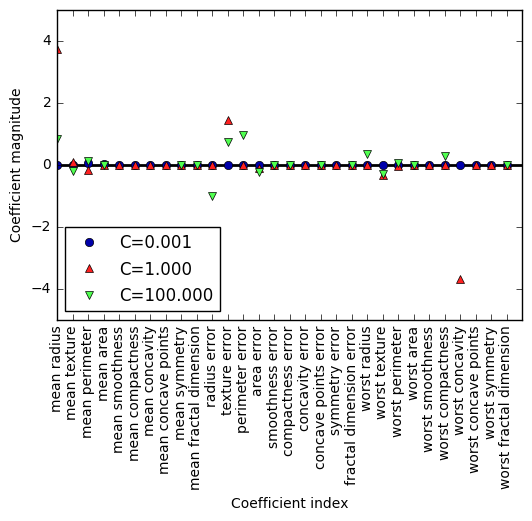

In [298]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### Linear Models for multiclass classification
Common technique: one-vs.-rest approach:

* A binary model is learned for each class vs. all other classes
* Creates as many binary models as there are classes
* Every binary classifiers makes a prediction, the one with the highest score (>0) wins

Build binary linear models:

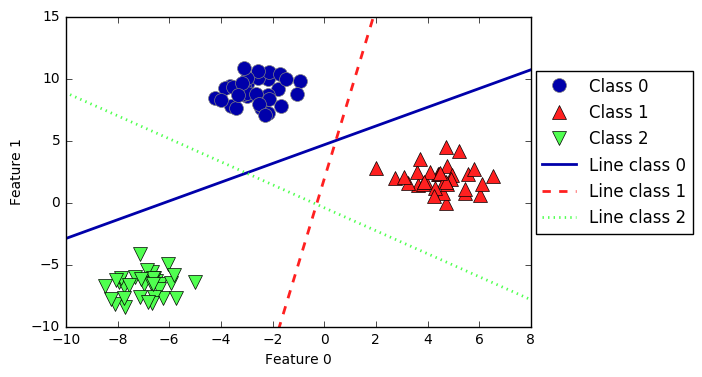

In [299]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Actual predictions (decision boundaries):

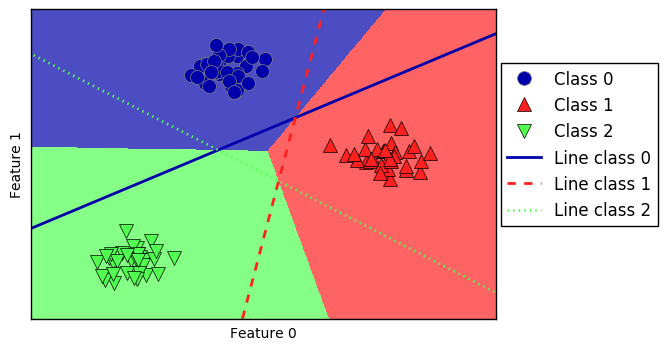

In [300]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Strengths, weaknesses and parameters
Regularization parameters:

* Regression: alpha (higher values, simpler models)
    * Ridge (L2), Lasso (L1), LinearRegression (None)
* Classification: C (smaller values, simpler models)
    * LogisticRegression or SVC (both have L1/L2 option)

L1 vs L2:

* L2 is default
* Use L1 if you assume that few features are important
    * Or, if model interpretability is important

Other options:

* ElasticNet regression: allows L1 vs L2 trade-off
* SGDClassifier/SGDRegressor: optimize $w_i$,$b$ with stochastic gradient descent (more scalable)

Consider linear models when:

* number of features is large compared to the number of samples
    * other algorithms perform better in low-dimensional spaces 
* very large datasets (fast to train and predict)
    * other algorithms become (too) slow



### Naive Bayes Classifiers
Predict the probability that a point belongs to each class, using Bayes' Theorem, assuming that the features are independent from each other.

Very fast. They work by only extracting statistics from each feature.

GaussianNB:

* Computes mean $\mu_c$ and standard deviation $\sigma_c$ of the feature values per class (fits a Gaussian distribution)
* Predicts by computing the joint probability given all features

$p(c \mid \mathbf{x}) = \frac{p(c) \ p(\mathbf{x} \mid c)}{p(\mathbf{x})}$

$p(x=v \mid c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$

[Naive Bayes image](images/nb.png)

Visualizing Naive Bayes

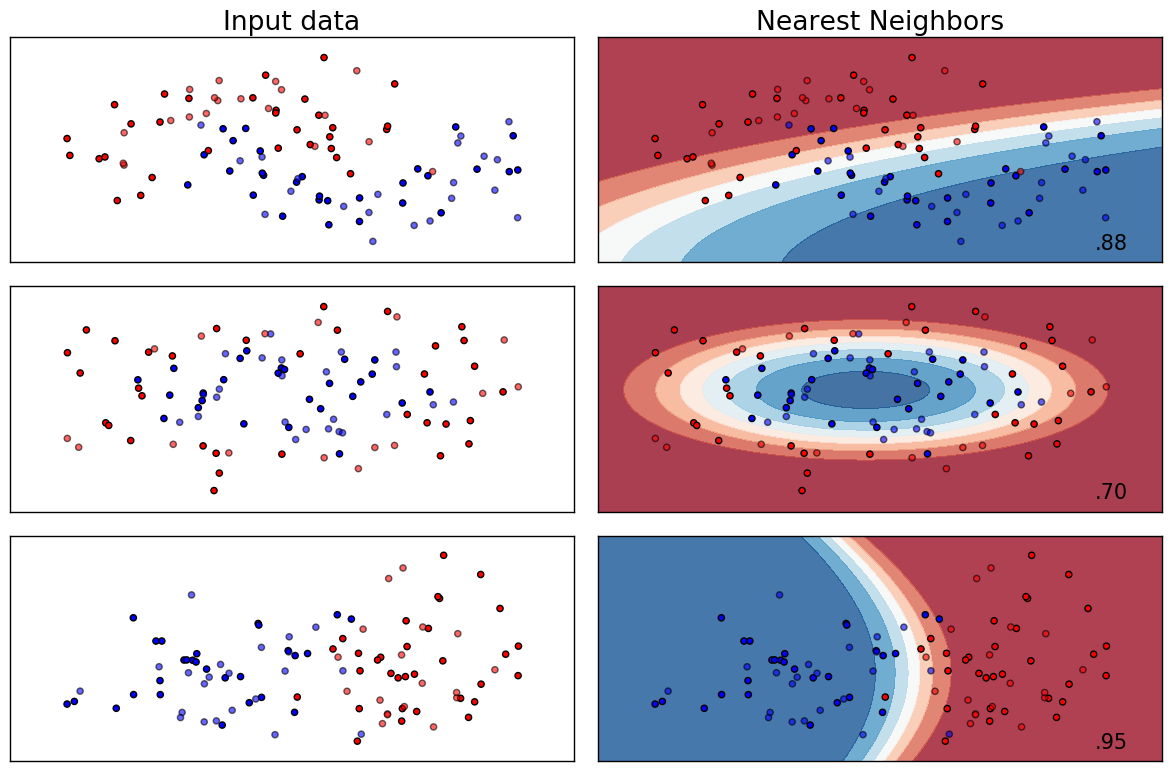

In [301]:
from sklearn.naive_bayes import GaussianNB
import plot_classifiers as pc

names = ["Nearest Neighbors"]
classifiers = [GaussianNB()]

plt.rcParams.update({'font.size': 16})
pc.plot_classifiers(names, classifiers, figuresize=(12,8))

Other Naive Bayes classifiers:
    
* BernoulliNB
    * Assumes binary data
    * Feature statistics: Number of non-zero entries per class
* MultinomialNB
    * Assumes count data
    * Feature statistics: Average value per class

Mostly used for text classification (bag-of-words data)

#### Strengths, weaknesses and parameters
BernoulliNB and MultinomialNB have a regularization parameter `alpha`

* Works by adding `alpha` virtual data points with only positive values
* Larger `alpha` smooths the feature statistics, thus simpler models
* Effect is typically small

GaussianNB is widely used for high-dimensional data or large datasets (fast)  
BernoulliNB and MultinomialNB are popular for sparse count data such as text

A comparison

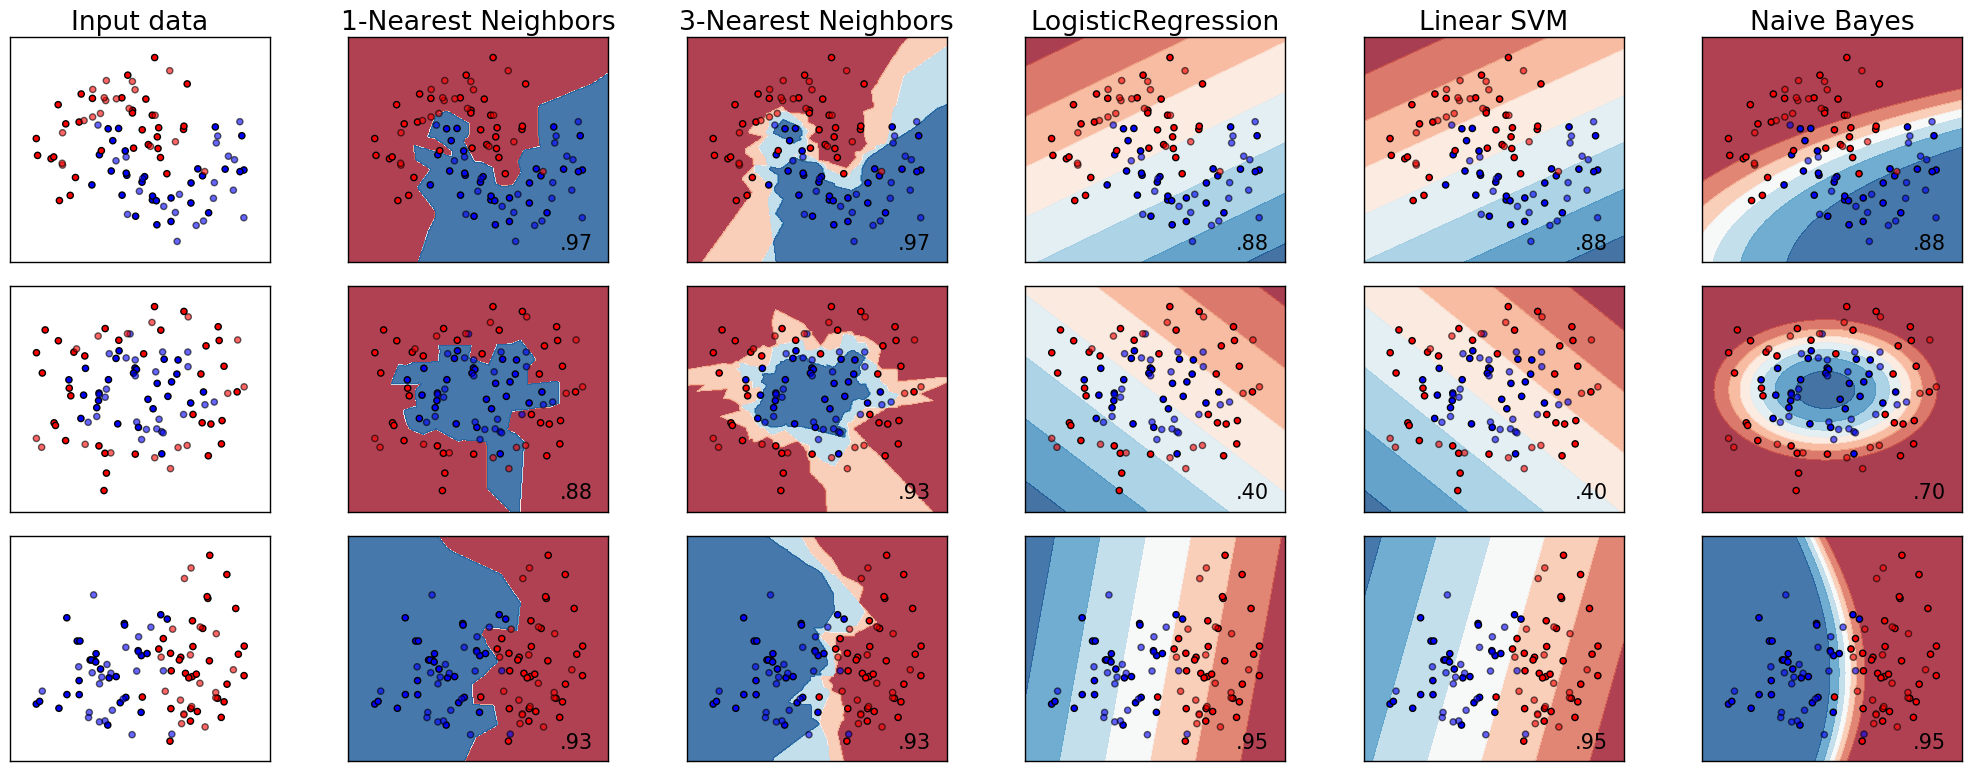

In [302]:
from sklearn.naive_bayes import GaussianNB
import plot_classifiers as pc

names = ["1-Nearest Neighbors", "3-Nearest Neighbors", "LogisticRegression", "Linear SVM", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(1),
    KNeighborsClassifier(3),
    LogisticRegression(),
    LinearSVC(),
    GaussianNB()]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))

### Decision trees

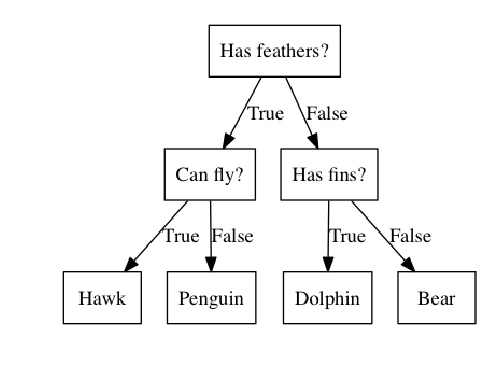

In [303]:
mglearn.plots.plot_animal_tree()

#### Building Decision Trees
* Split the data in two (or more) parts
* Search over all possible splits and choose the one that is most _informative_
    * Many heuristics
    * E.g. _information gain_: how much does the entropy of the class labels decrease after the split (purer 'leafs')
* Repeat recursive partitioning

Making predictions:
    
* Classification: find leaf for new data point, predict majority class (or class distribution)
* Regression: idem, but predict the _mean_ of all values    

#### Decision Tree classification

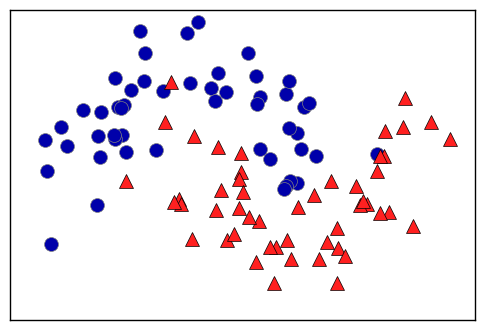

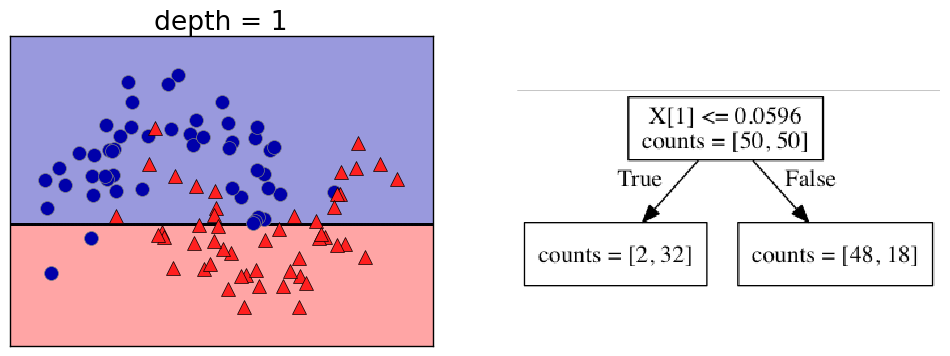

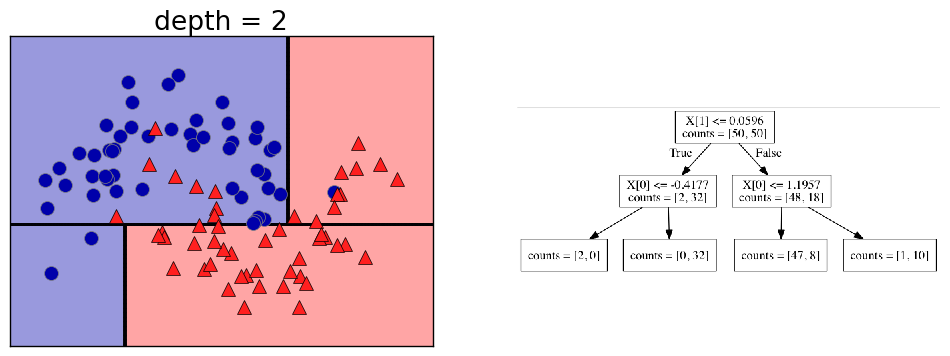

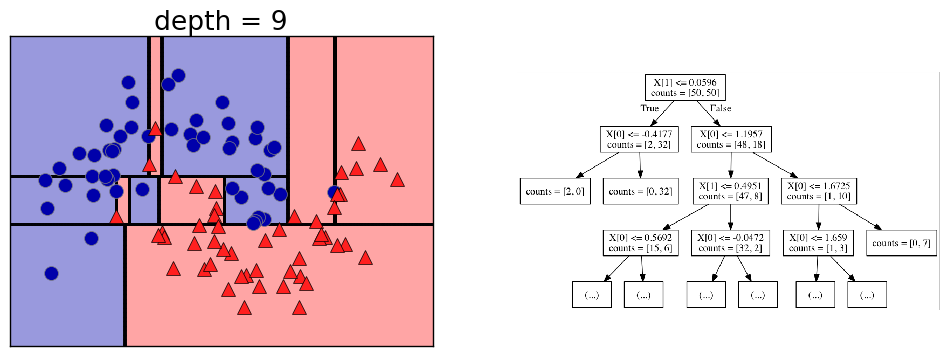

In [304]:
mglearn.plots.plot_tree_progressive()

#### Controlling complexity of Decision Trees
Decision trees can very easily overfit the data. Regularization strategies:  

* Pre-pruning: stop creation of new leafs at some point
    * Limiting the depth of the tree, or the number of leafs
    * Requiring a minimal leaf size (number of instances)
* Post-pruning: build full tree, then prune (join) leafs
    * Reduced error pruning: evaluate against held-out data
    * Many other strategies exist. 
    * scikit-learn supports none of them (yet)

Effect of pre-pruning: default tree overfits, setting `max_depth=4` is better

In [305]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [306]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Analyzing Decision Trees: find the path that most data takes

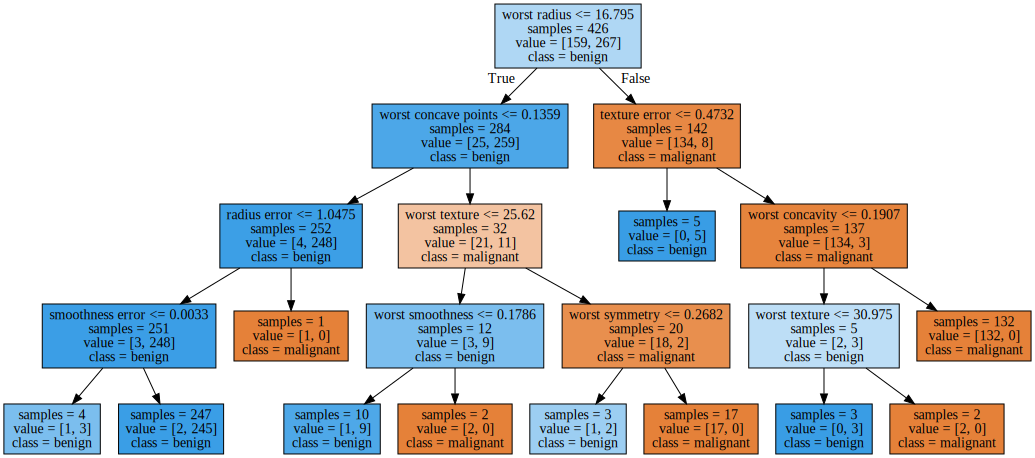

In [307]:
# Creates a .dot file
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)
# Open and display
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

`DecisionTreeClassifier` also returns _feature importances_

* In [0,1], sum up to 1
* High values for features selected by the algorithm
* Other features may also be relevant, but don't contribute new information given the selected features

In [308]:
# Feature importances sum up to 1
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.01
  0.048  0.     0.     0.002  0.     0.     0.     0.     0.     0.727
  0.046  0.     0.     0.014  0.     0.018  0.122  0.012  0.   ]


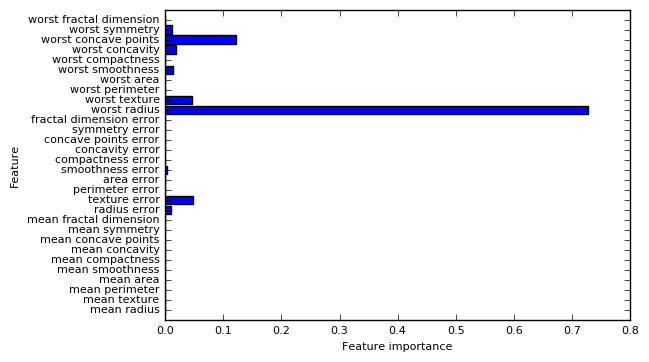

In [309]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.rcParams.update({'font.size': 8})
plot_feature_importances_cancer(tree)

#### Decision tree regression
Regression is done with  `DecisionTreeRegressor`

Note that decision trees do not extrapolate well. The leafs return the same _mean_ value no matter how far the new data point lies from the training examples.

In [310]:
def plot_decision_tree_regression(regr_1, regr_2):
    # Create a random dataset
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))

    # Fit regression model
    regr_1.fit(X, y)
    regr_2.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

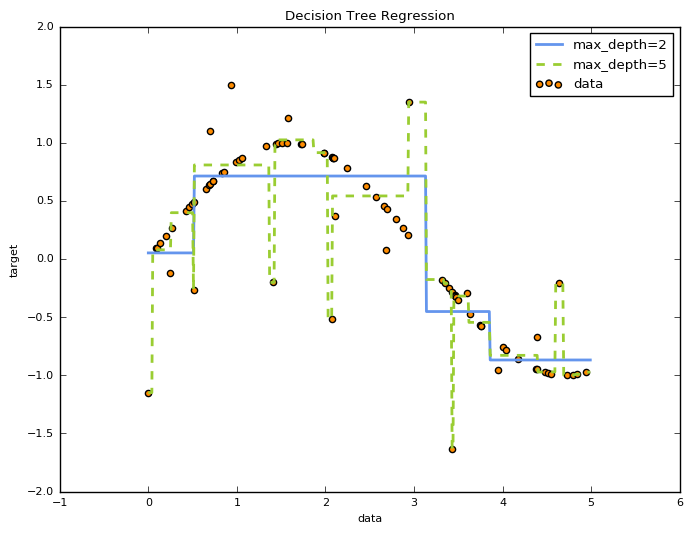

In [311]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

plot_decision_tree_regression(regr_1,regr_2)

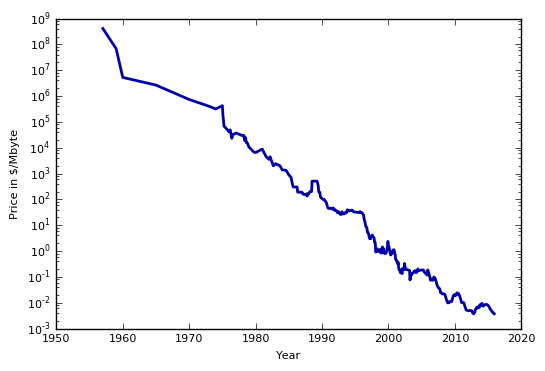

In [312]:
ram_prices = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

In [313]:
from sklearn.tree import DecisionTreeRegressor
# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

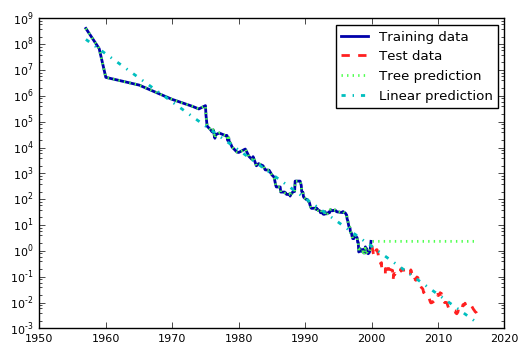

In [314]:
plt.rcParams['lines.linewidth'] = 2
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend();

#### Strengths, weaknesses and parameters
Pre-pruning: regularize by:

* Setting a low `max_depth`, `max_leaf_nodes`
* Setting a higher `min_samples_leaf` (default=1)

Decision trees: 

* Work well with features on completely different scales, or a mix of binary and continuous features
    * Does not require normalization
* Interpretable, easily visualized
* Still tend to overfit easily. Use ensembles of trees.

### Ensemble learning
Ensembles are methods that combine multiple machine learning models to create more powerful models. Most popular are:

* __RandomForests__: Build randomized trees on random samples of the data
* __Gradient boosting machines__: Build trees iteratively, giving higher weights to the points misclassified by previous trees

In both cases, predictions are made by doing a vote over the members of the example.  
__Stacking__ is another technique that builds a (meta)model over the predictions of each member.

### RandomForests
Reduce overfitting by averaging out individual predictions (variance reduction)

* Take a _bootstrap sample_ of your data
    * Randomly sample with replacement
* In each node of the decision tree, only consider a random subset of features of size `max_features`
    * Small `max_features` yields more different trees, more smoothing
    * Default: $sqrt(n\_features)$ for classification, $log2(n\_features)$ for regression
* Repeat `n_estimators` times 
    * Higher values: more trees, more smooting

In [315]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

Making predictions:
* Classification: soft voting
    * Every member returns probability for each class
    * After averaging, the class with highest probability wins
* Regression:  
    * Return the _mean_ of all predictions

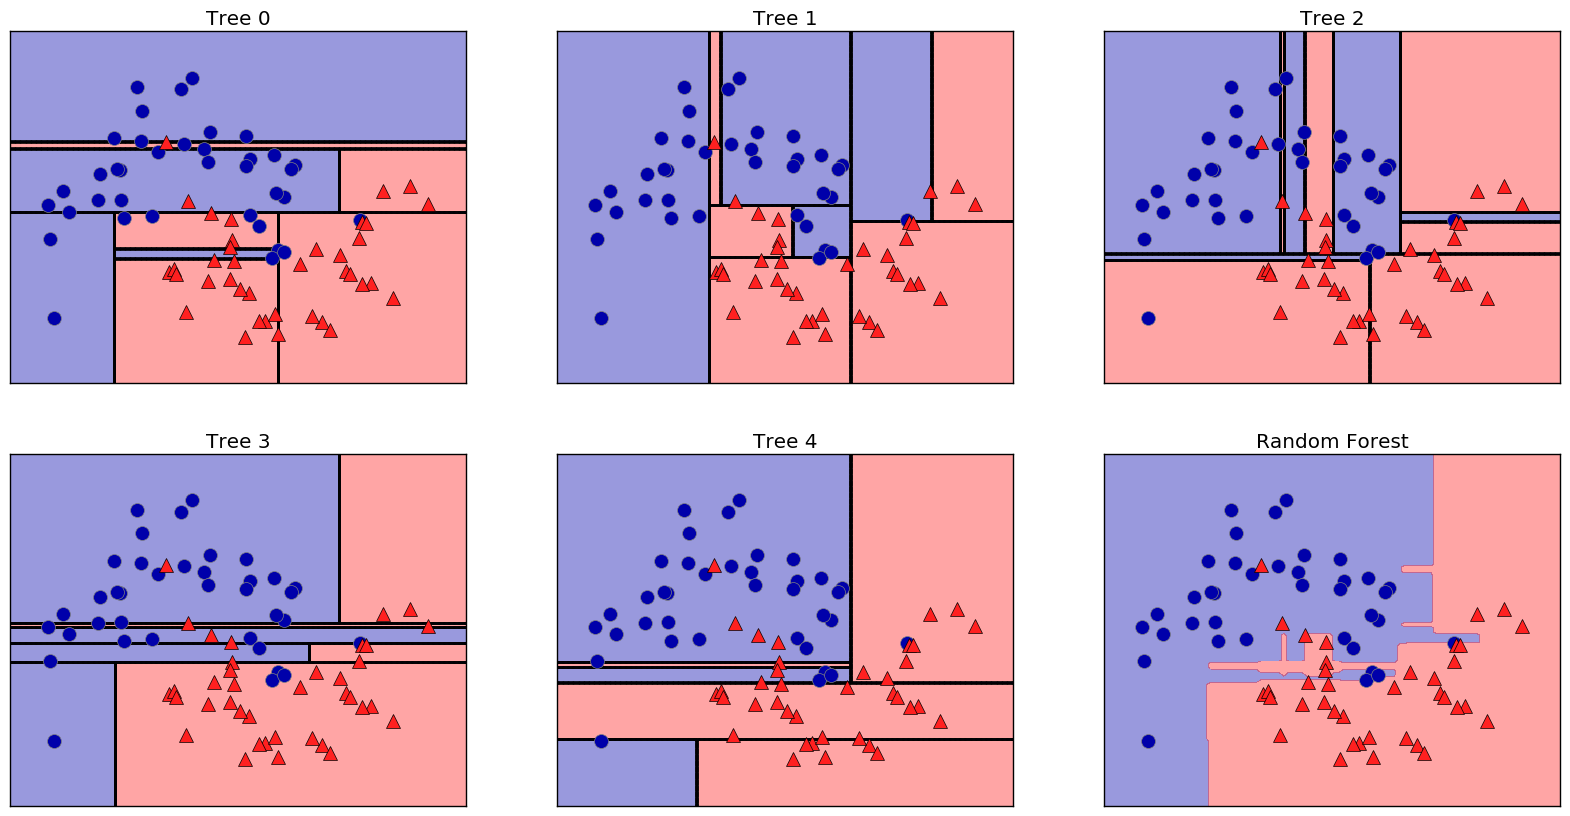

In [316]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

Most important parameters:

* `n_estimators` (higher is better, but diminishing returns)
* `max_features` (default is typically ok)
    * Set smaller to reduce space/time requirements
* parameters of trees, e.g. `max_depth` (less effect)

`n_jobs` sets the number of parallel cores to run  
`random_state` should be fixed for reproducibility

In [317]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [318]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


RandomForests provide more reliable feature importances, based on many alternative hypotheses (trees)

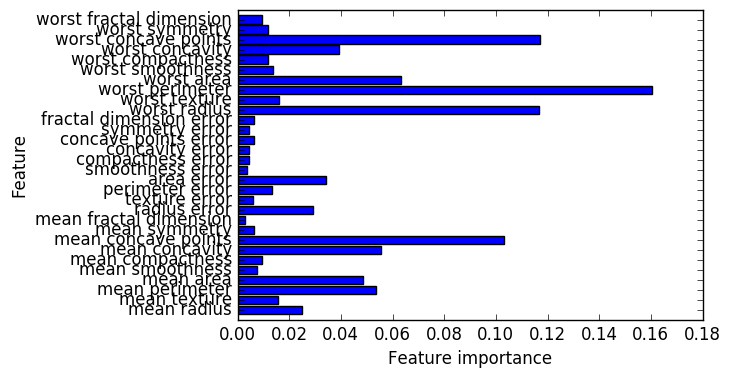

In [319]:
plot_feature_importances_cancer(forest)

#### Strengths, weaknesses and parameters
RandomForest are among most widely used algorithms:

* Don't require a lot of tuning
* Typically very accurate models
* Handles heterogeneous features well
* Implictly selects most relevant features

Downsides:

* less interpretable, slower to train (but parallellizable)
* don't work well on high dimensional sparse data (e.g. text)

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)
Instead of reducing the variance of overfitted models, reduce the bias of underfitted models

* Use strong pre-pruning to build very shallow trees
    * Default `max_depth`=3
* Iteratively build new trees by increasing weights of points that weree badly predicted
    * `learning rate` controls how strongly the weights are altered (default 0.1)
    * Gradient descent finds optimal set of weights
* Repeat `n_estimators` times (default 100)

Each tree provides good predictions on part of the data, use voting for final prediction

In [320]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [321]:
# We are overfiting. We can decrease max_depth
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [322]:
# or decrease the learning rate (less effect)
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Gradient boosting machines completely ignore some of the features

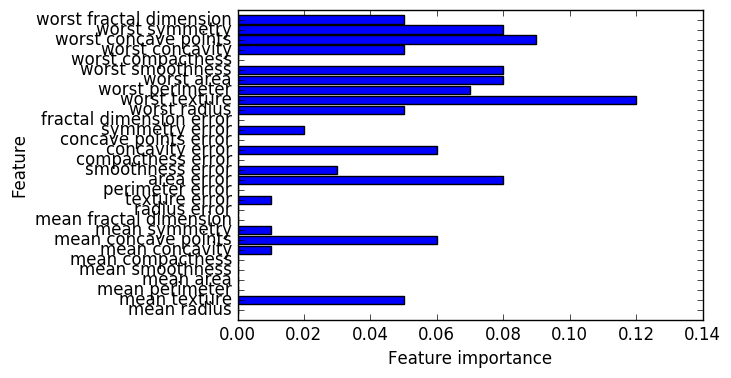

In [323]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### Strengths, weaknesses and parameters
* Among the most powerful and widely used models
* Work well on heterogeneous features and different scales
* Require careful tuning, take longer to train.
* Does not work well on high-dimensional sparse data

Main hyperparameters:

* `n_estimators`: Higher is better, but will start to overfit
* `learning_rate`: Lower rates mean more trees are needed to get more complex models
    * Set `n_estimators` as high as possible, then tune `learning_rate`
* `max_depth`: typically kept low (<5), reduce when overfitting

Comparison

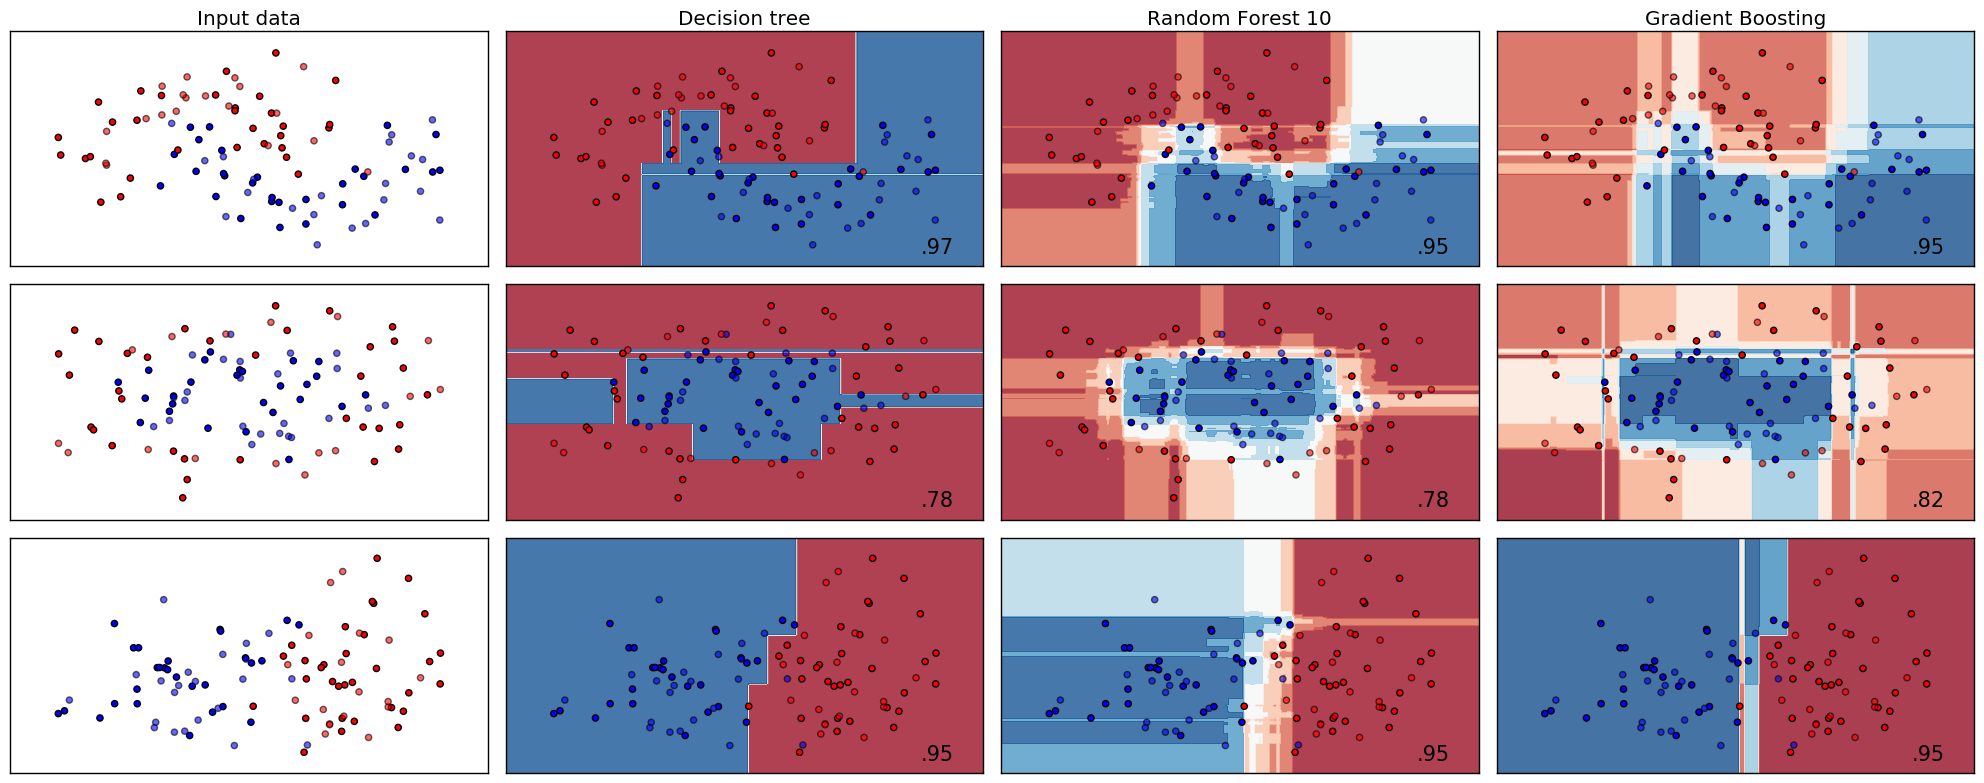

In [324]:
names = ["Decision tree", "Random Forest 10", "Gradient Boosting"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GradientBoostingClassifier(random_state=0, learning_rate=0.5)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))

### Kernelized Support Vector Machines

* Linear models work well in high dimensional spaces.
* You can _create_ additional dimensions yourself.
* Let's start with an example.

Our linear model doesn't fit the data well

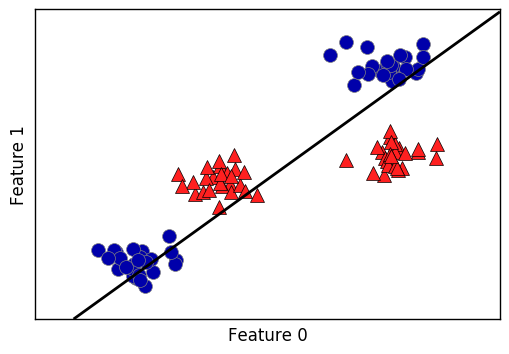

In [325]:
from sklearn.svm import LinearSVC
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

We can add a new feature by taking the squares of feature1 values

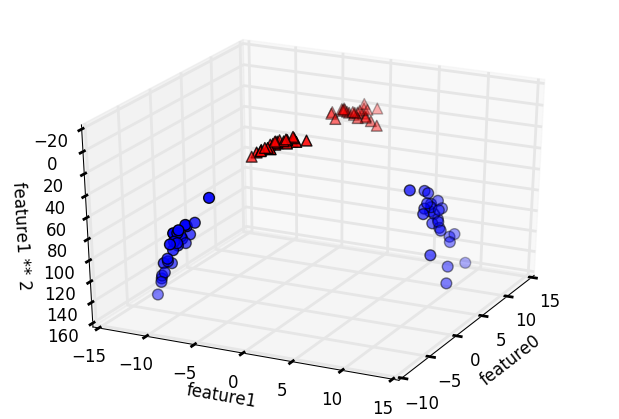

In [326]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

Now we can fit a linear model

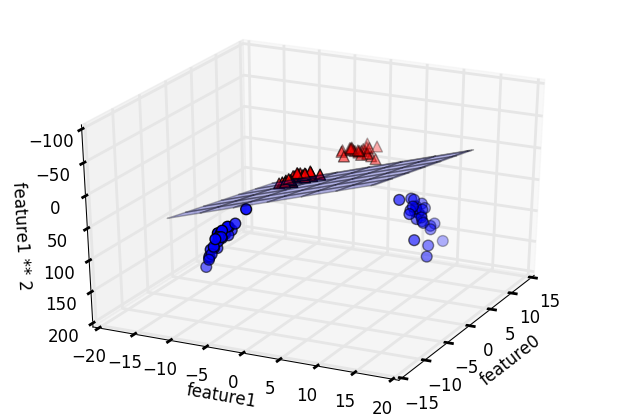

In [327]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore, but more of an ellipse

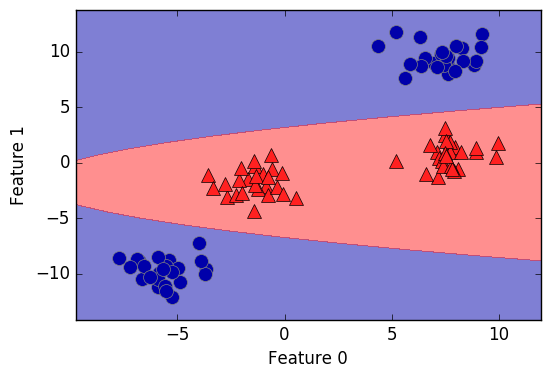

In [328]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

#### The Kernel Trick

* Adding nonlinear features can make linear models much more powerful
* Often we don’t know which features to add, and adding many features might make computation very expensive
* Mathematical trick (_kernel trick_) allows us to directly compute distances (scalar products) in the high dimensional space
    * We can search for the nearest support vector in the high dimensional space
* A _kernel function_ is a distance (similarity) function with special properties for which this trick is possible

There are many kernels available (and you can create your own)  
The most popular are:

* Polynomial kernel: computes all polynomials up to a certain degree of the original features
* Gaussian kernel, or radial basis function (RBF): considers all possible polynomials of all degrees
    * Infinite high dimensional space (Hilbert space), where the importance of the features decreases for higher degrees

### Understanding SVMs

To make a prediction for a new point, the distance to each of the support vectors is measured.

* The weight of each support vector is stored in the ` dual_coef_` attribute of SVC
* The distance between data points is measured by the kernel
    * Gaussian kernel: $krbf(x_1, x_2) = \exp(\gamma ||x_1 - x_2||^2)$
        * $\gamma$ controls the width of the kernel and can be tuned

Given the support vectors, their weigths, and the kernel, we can plot the decision boundary

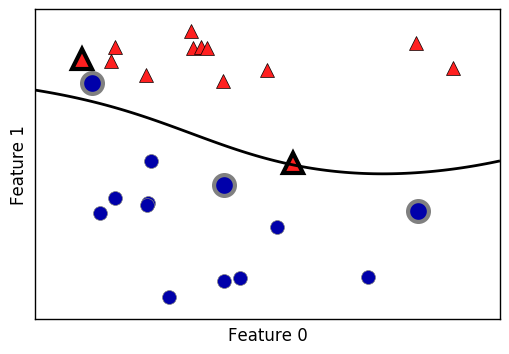

In [329]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# plot data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### Tuning SVM parameters
Several important parameters:

* gamma (kernel width): high values means that points are further apart
    * Leads to many support vectors, narrow Gaussians, overfitting
    * Low values lead to underfitting
* C (our linear regularizer): limits the weights of the support vectors
    * Higher values: more regularization, less overfitting
* For polynomial kernels, the _degree_ (exponent) defines the complexity of the models

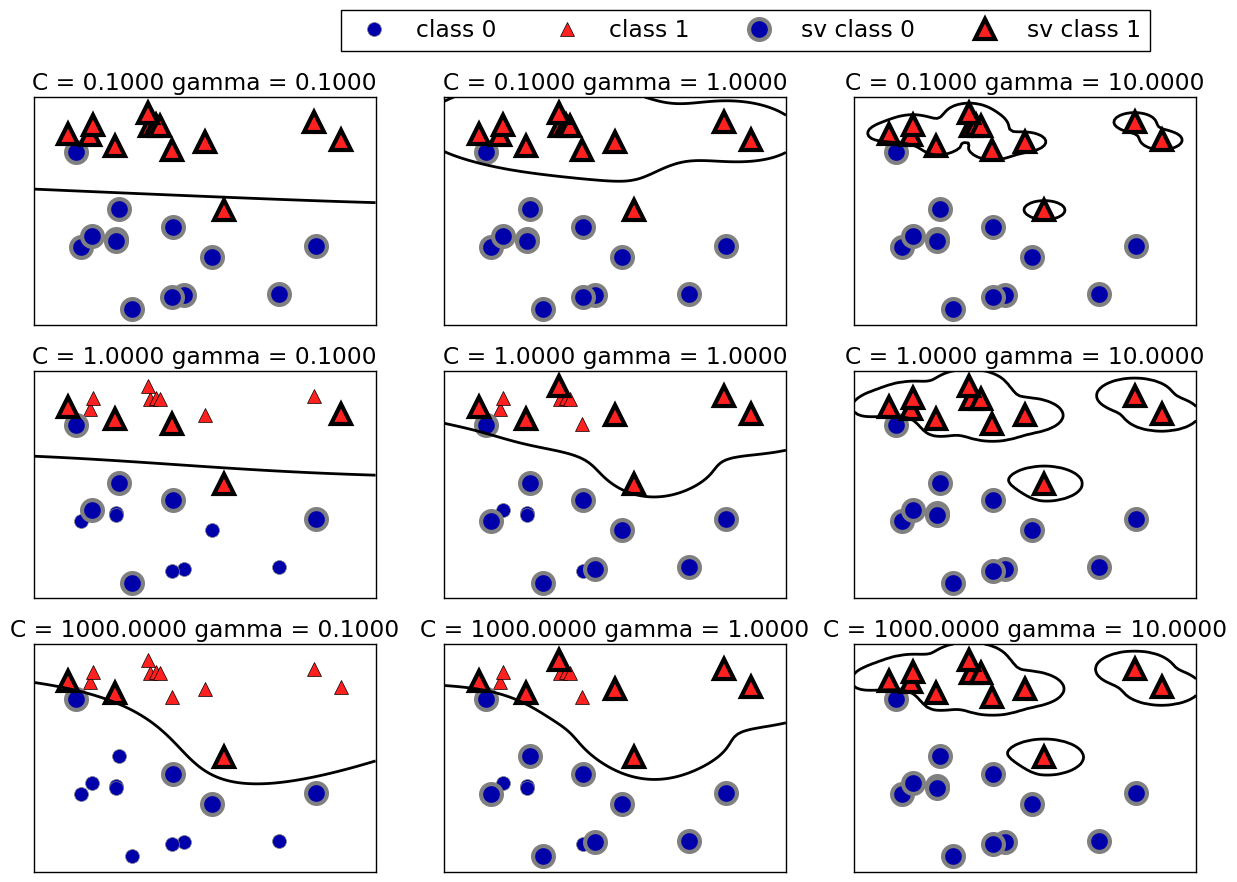

In [330]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2));

* Low gamma (left): wide Gaussians, very smooth decision boundaries
* High gamma (right): narrow Gaussians, boundaries focus on single points (high complexity)
* Low C (top): each support vector has very limited influence: many support vectores, almost linear decision boundary
* High C (bottom): Stronger influence, decision boundary bends to every support vector

### Preprocessing Data for SVMs
* SVMs are very sensitive to hyperparameter settings
* They expect all features to be approximately on the same scale
    * If not, they overfit easily

In [331]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


We can plot the scales of the features by plotting their min and max value

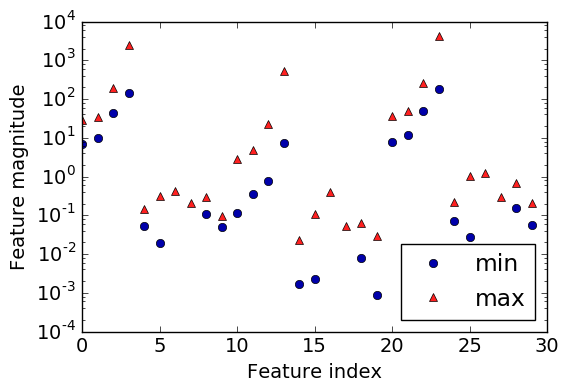

In [332]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [333]:
 # Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0) 
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterwards min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


* We must now apply the SAME transformation on the test set
    * Don't rescale the test set separately
    * Don't apply rescaling before making train test spits
* sklearn offers `pipelines` which make this easier
    * Wrapper around series of operators

In [334]:
# use THE SAME transformation on the test set,
# using min and range of the training set.
X_test_scaled = (X_test - min_on_training) / range_on_training

Much better results, but they can still be tuned further

In [335]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [336]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


### Strengths, weaknesses and parameters

* SVMs allow complex decision boundaries, even with few features. 
* Work well on both low- and high-dimensional data

* Don't scale very well to large datasets (>100000)
* Require careful preprocessing of the data and tuning of the parameters. 
* SVM models are hard to inspect

Important parameters:
* regularization parameter _C_
* choice of the kernel and kernel-specific parameters
    * Typically string correlation with _C_

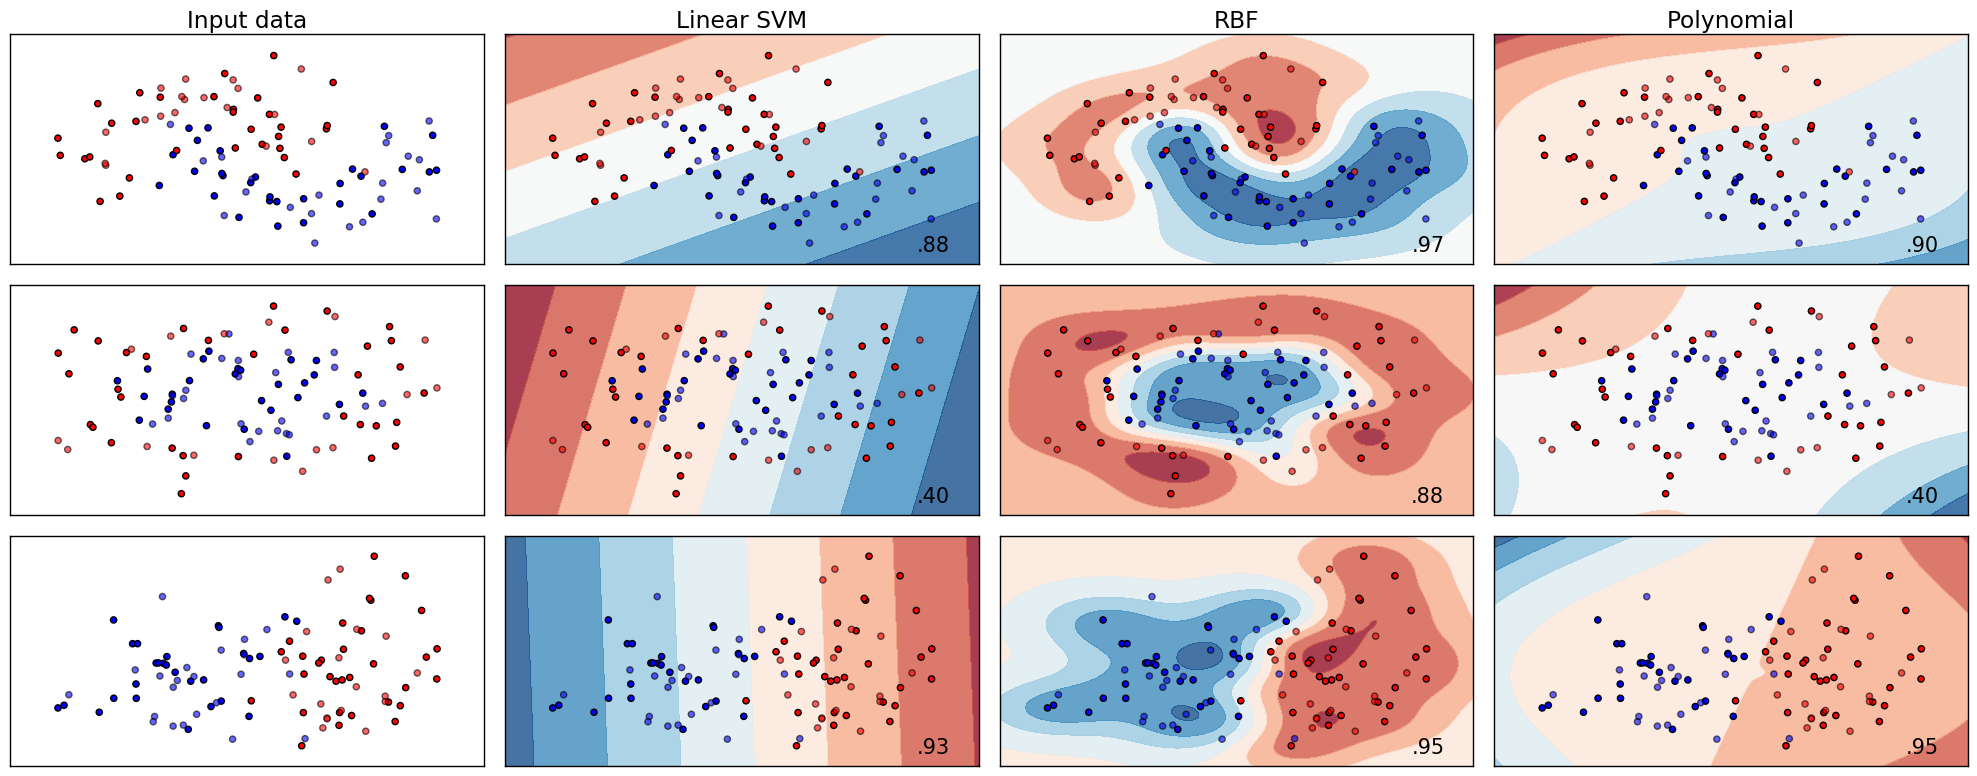

In [337]:
names = ["Linear SVM", "RBF", "Polynomial"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", degree=3, C=0.1)
    ]

pc.plot_classifiers(names, classifiers, figuresize=(20,8))

### Neural Networks (Multi-layer Perceptrons)
* Deep learning shows great promise, when tailored very carefully to a specific use case. 
* Here, we will only discuss multilayer perceptrons (MLPs) for classification and regression
    * Also known as _feed-forward networks_

Remember that the prediction of a linear regressor is given as:
        
$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b$

Which we can graphically display as follows:

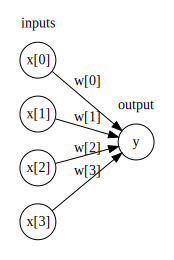

In [338]:
display(mglearn.plots.plot_logistic_regression_graph())

In an MLP, this process is repeated multiple times:

* First compute _hidden units_
* Combine them again using a weighted sum to yield the outcome
* Many more weight to learn

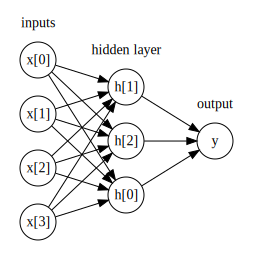

In [339]:
display(mglearn.plots.plot_single_hidden_layer_graph())

* But: a series of weighted sums is just a weighted sum, so our model remains linear
* one more trick: after computing the weighted sum for each hidden unit, apply a non-linear function
    * rectified linear unit (relu)
    * tangens hyperbolicus (tanh)

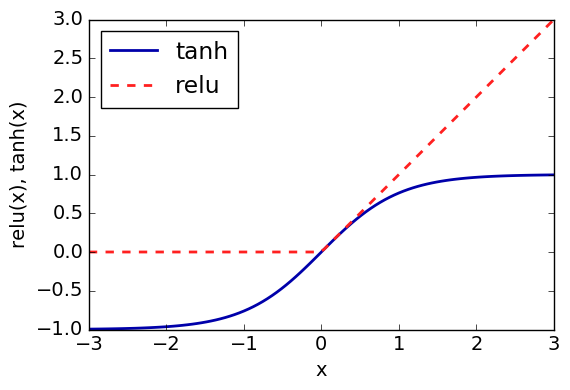

In [340]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

We can now build arbitrarily complex models by adding more layers  
This yields many weights that need to be tuned

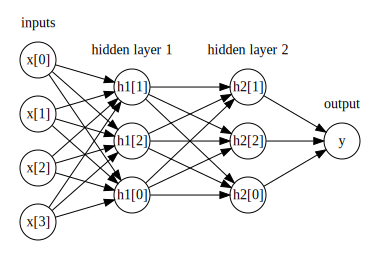

In [341]:
mglearn.plots.plot_two_hidden_layer_graph()

Let's run and visualize the `MLPClassifier`

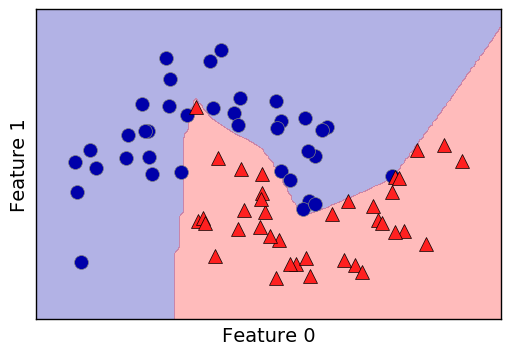

In [342]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, MLP uses 100 hidden nodes, we don't need that many here

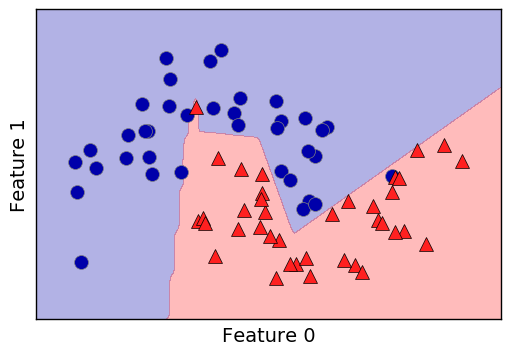

In [343]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* The default nonlinearity is relu. 
* With a single hidden layer, this means the decision function will be made up of 10 straight line segments. 

Smoother decision function:

* Add more hidden units
* Add a second hidden layer
* Use the tanh nonlinearity

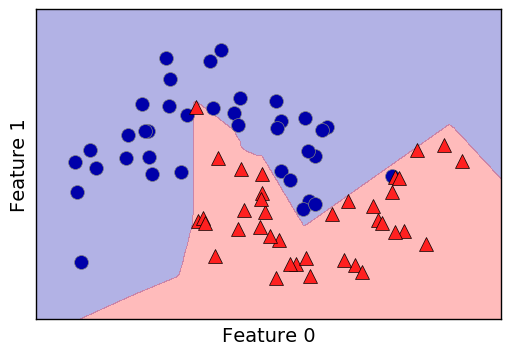

In [344]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

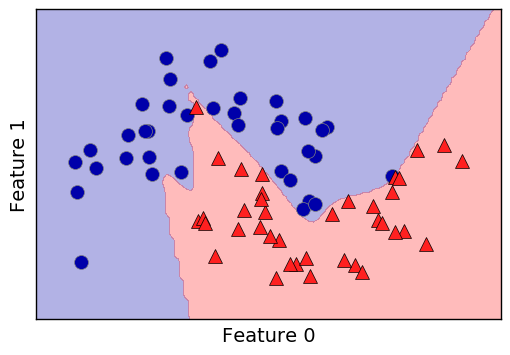

In [345]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* We can control the complexity of a neural network by using an L2 penalty to shrink the weights toward zero
* Parameter alpha, default is very low (little regularization)

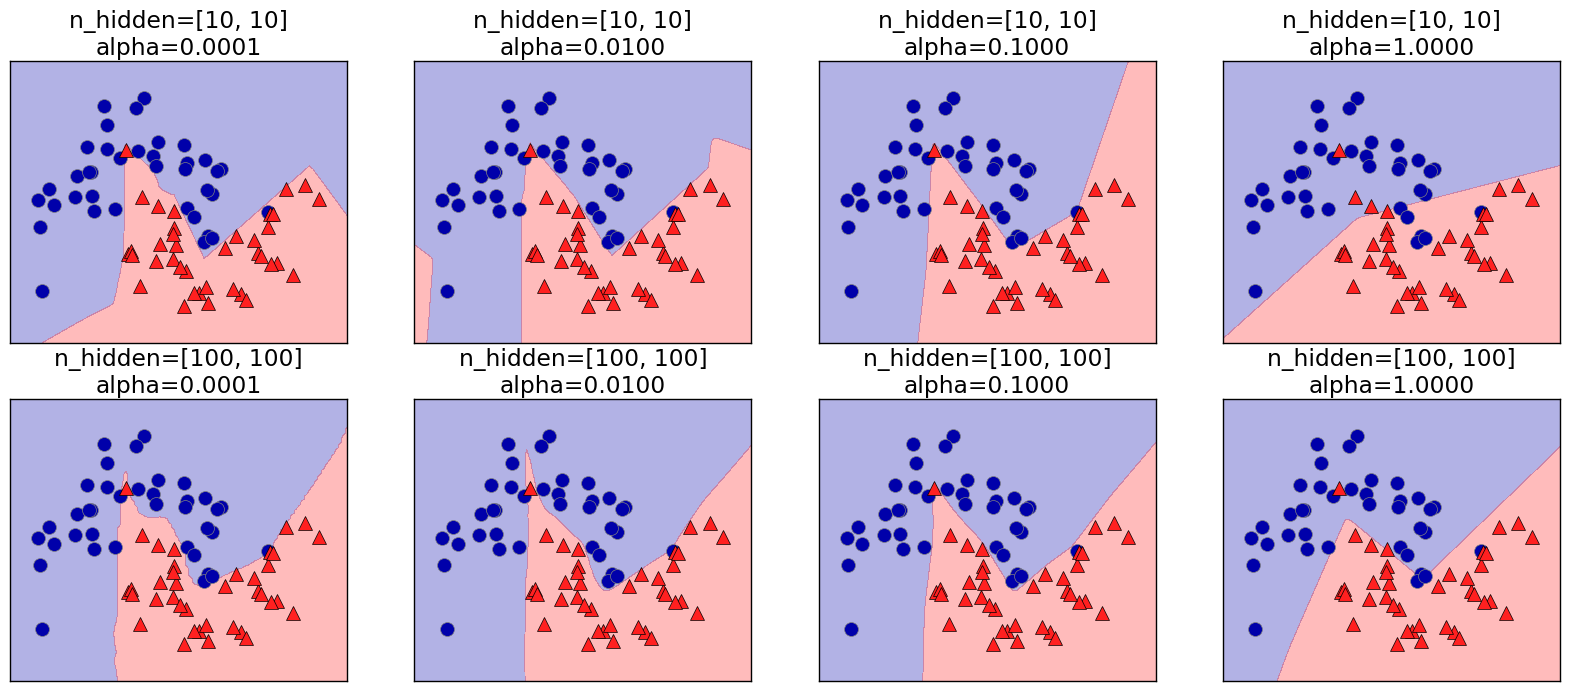

In [346]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

* Weights are set randomly (initialized) before learning is started
* Even with exactly the same parameters, we can obtain very different models 
* Fix the `random_state` to avoid this

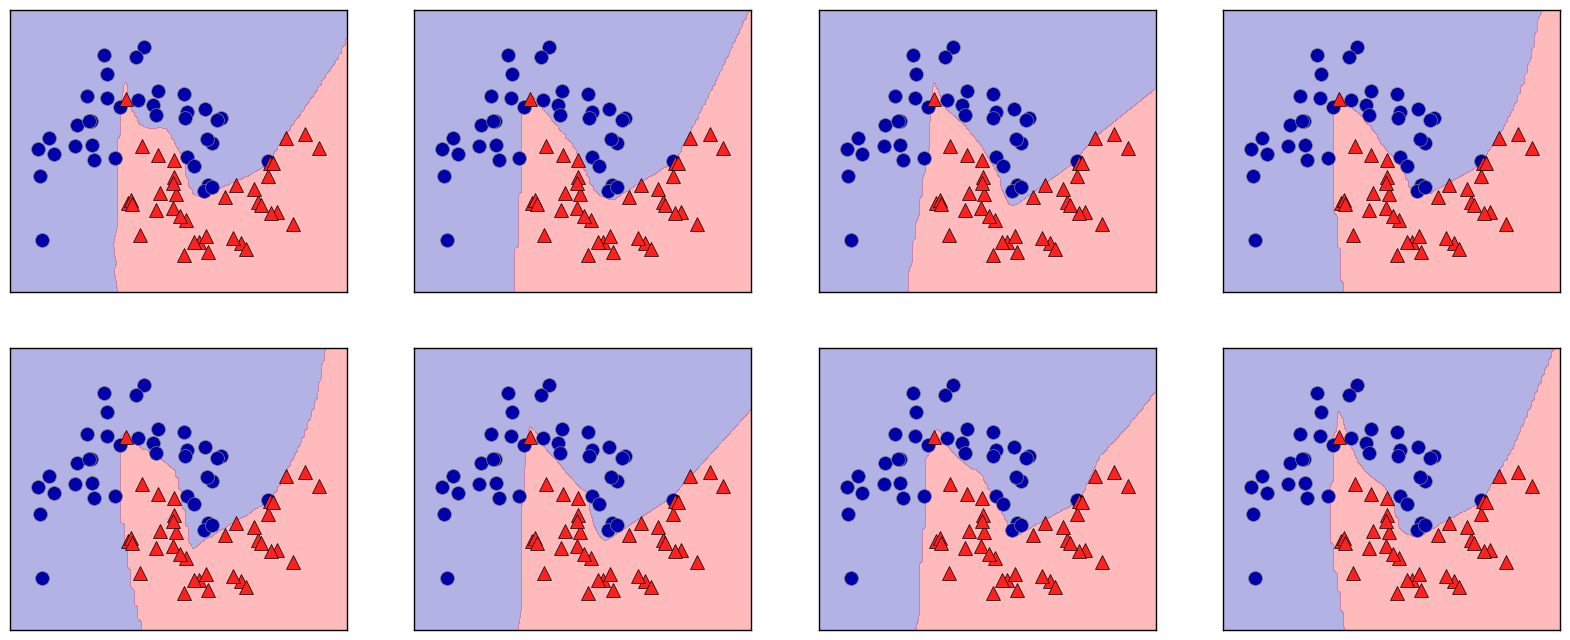

In [347]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

Try it on real data

In [348]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[   28.11     39.28    188.5    2501.        0.163     0.345     0.427
     0.201     0.304     0.097     2.873     4.885    21.98    542.2
     0.031     0.135     0.396     0.053     0.079     0.03     36.04
    49.54    251.2    4254.        0.223     1.058     1.252     0.291
     0.664     0.207]


In [349]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


In [350]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, scale by inverse standard deviation
# afterwards, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


In [351]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
      mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [352]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
       mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


Heat map of the first layer weights in a neural network learned on the Breast Cancer dataset. 100 hidden units.

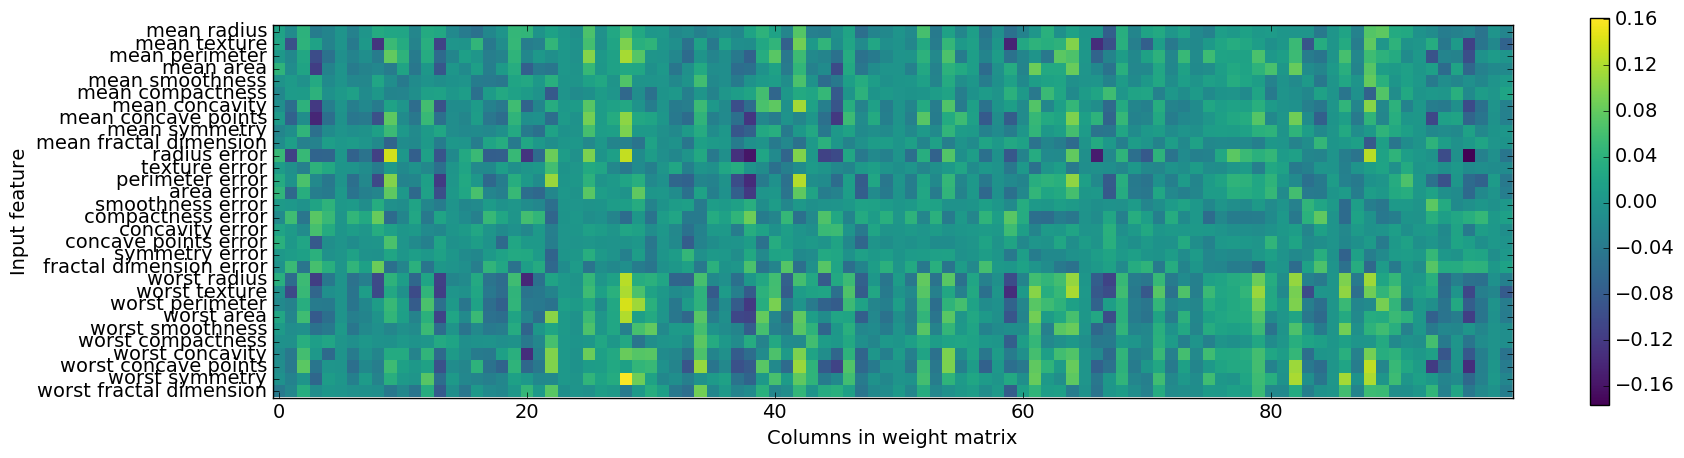

In [353]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Strengths, weaknesses and parameters
##### Estimating complexity in neural networks

### Uncertainty estimates from classifiers

In [354]:
# create and split a synthetic dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train test split with arbitrary many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

#### The Decision Function

In [355]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
      gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [356]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [357]:
print("Thresholded decision function:\n{}".format(
      gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [358]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(
      np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [359]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


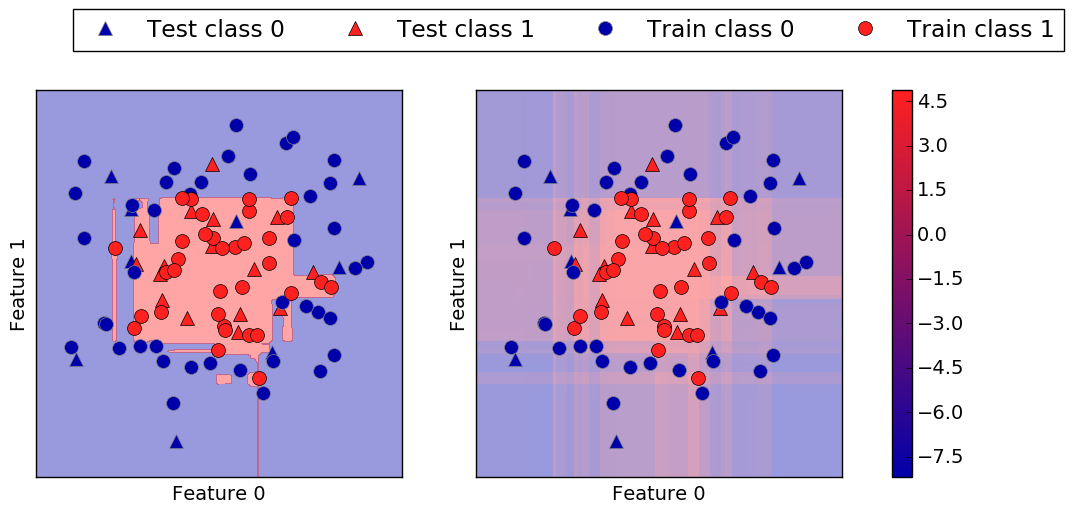

In [360]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1));

#### Predicting probabilities

In [361]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [362]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
      gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[ 0.016  0.984]
 [ 0.846  0.154]
 [ 0.981  0.019]
 [ 0.974  0.026]
 [ 0.014  0.986]
 [ 0.025  0.975]]


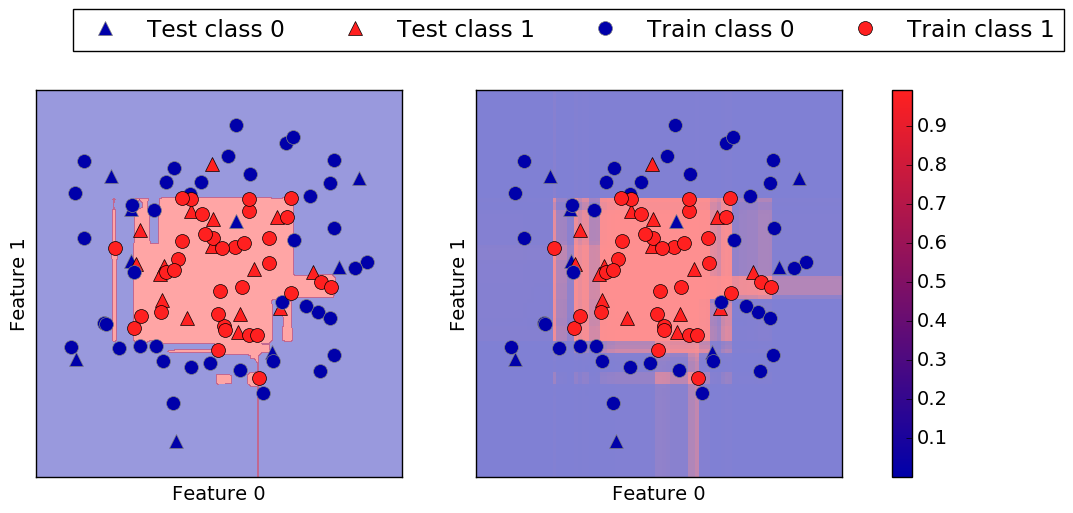

In [363]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

#### Uncertainty in multi-class classification

In [364]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [365]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.529  1.466 -0.504]
 [ 1.512 -0.496 -0.503]
 [-0.524 -0.468  1.52 ]
 [-0.529  1.466 -0.504]
 [-0.531  1.282  0.215]
 [ 1.512 -0.496 -0.503]]


In [366]:
print("Argmax of decision function:\n{}".format(
      np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [367]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[ 0.107  0.784  0.109]
 [ 0.789  0.106  0.105]
 [ 0.102  0.108  0.789]
 [ 0.107  0.784  0.109]
 [ 0.108  0.663  0.228]
 [ 0.789  0.106  0.105]]
Sums: [ 1.  1.  1.  1.  1.  1.]


In [368]:
print("Argmax of predicted probabilities:\n{}".format(
      np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [369]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
      logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


### Summary and Outlook